<a href="https://colab.research.google.com/github/Laharikv/ML_projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=1021,epochs=2,validation_split=0.2,verbose=1)

Epoch 1/2
48/48 [==============================] - 38s 773ms/step - loss: 1.2361 - accuracy: 0.5868 - val_loss: 0.8088 - val_accuracy: 0.7017
Epoch 2/2
48/48 [==============================] - 36s 750ms/step - loss: 0.6210 - accuracy: 0.7684 - val_loss: 0.5947 - val_accuracy: 0.7763


In [ ]:
y_prob=model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7772

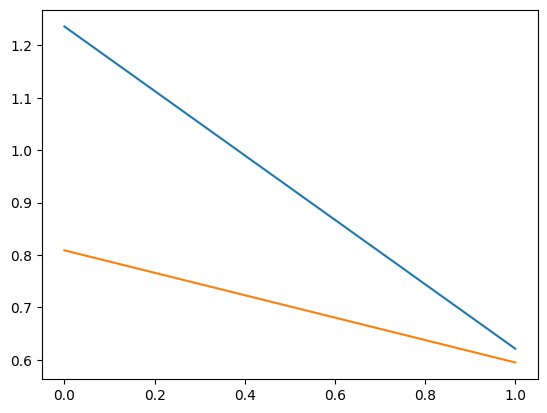

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

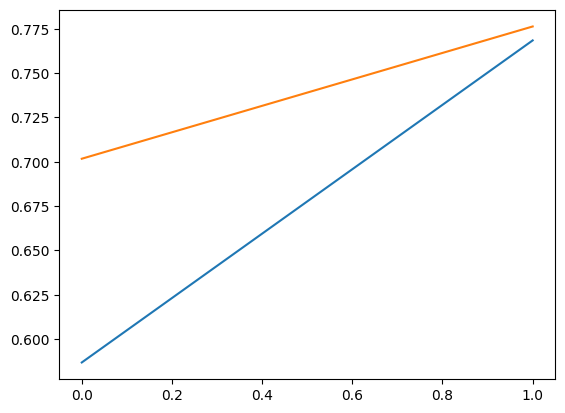

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

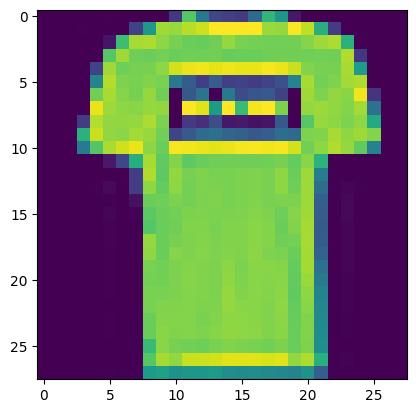

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])